<a href="https://colab.research.google.com/github/Hsuyeon01/ESAA/blob/main/%EA%B8%B0%EB%B3%B8_%EB%B6%84%EB%A5%98_%EC%9D%98%EB%A5%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## 패션 MNIST 데이터셋 임포트하기

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
#  데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 데이터 전처리

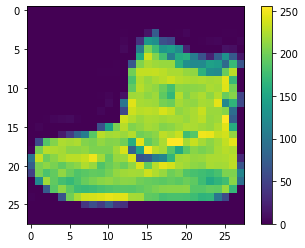

In [9]:
plt.figure()
plt.imshow(train_images[0]) # 첫 번째 이미지
plt.colorbar()
plt.grid(False)
plt.show()

- 픽셀 범위가 0~255 사이

In [10]:
# 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

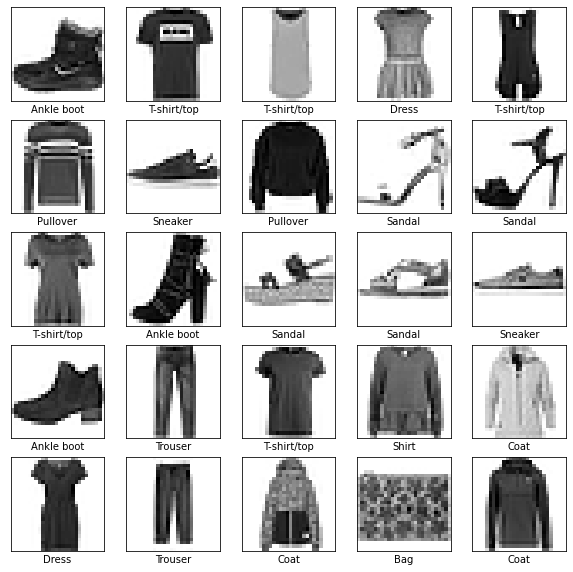

In [11]:
# 훈련세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

### 1) 층 설정

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # 2차원 배열 -> 1차원 배열로 변환
    tf.keras.layers.Dense(128, activation='relu'), # 밀집연결층, 완전연결층
    tf.keras.layers.Dense(10) # 소프트맥스층, 10개의 확률을 반환하고 반환된 값의 전체 합은 1
    # 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력
])

### 2) 모델 컴파일

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련

1. 훈련 데이터를 모델에 주입
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
2. 테스트 세트에 대한 모델의 예측을 만듦
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인


### 1) 모델 피드

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5016 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3762 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3383 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3142 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2967 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2799 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2701 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2565 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2473 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.237

### 2) 정확도 평가 

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3551 - accuracy: 0.8773 - 567ms/epoch - 2ms/step

Test accuracy: 0.8773000240325928


### 3) 예측하기 

In [22]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [24]:
# 첫번째 예측
predictions[0]

array([1.8163084e-05, 2.9073684e-08, 2.4351767e-08, 3.6981990e-10,
       2.5394590e-07, 7.7892193e-03, 3.9728724e-07, 1.3917692e-01,
       1.0042753e-07, 8.5301489e-01], dtype=float32)

In [25]:
# 가장 높은 신뢰도를 가진 레이블
np.argmax(predictions[0])

9

In [26]:
# 확인
test_labels[0]

9

In [27]:
# 예측 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 4) 예측 확인

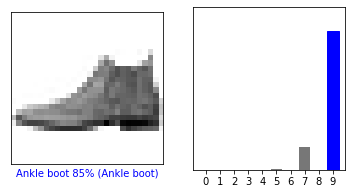

In [29]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

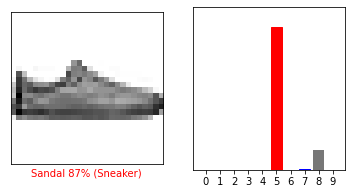

In [30]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

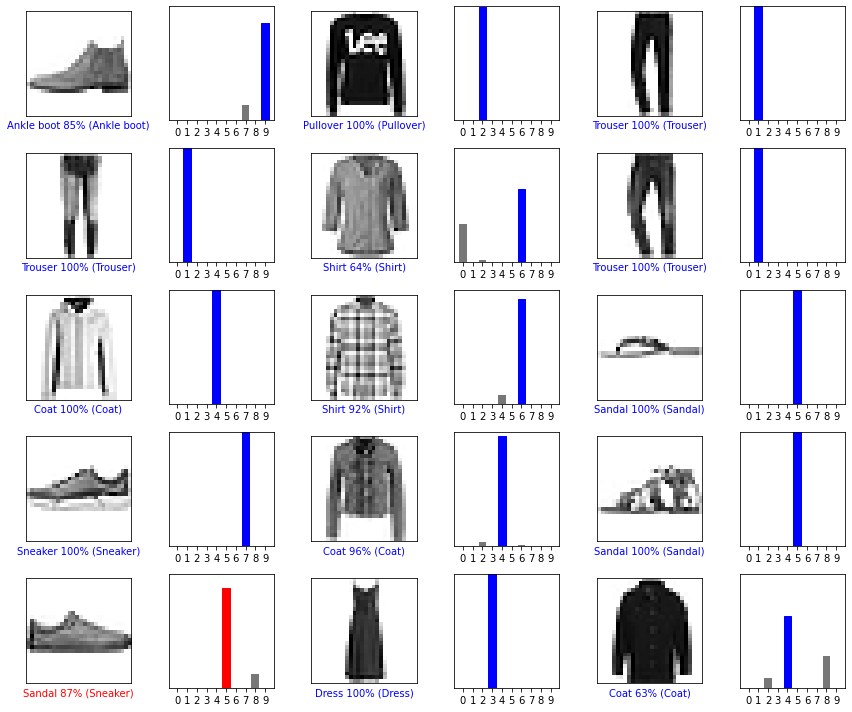

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기

In [32]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [33]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[7.6820397e-05 9.7868591e-10 9.9675864e-01 4.2210676e-11 3.0354923e-03
  1.5613583e-08 1.2902508e-04 4.7187184e-13 2.1504844e-08 2.0073427e-14]]


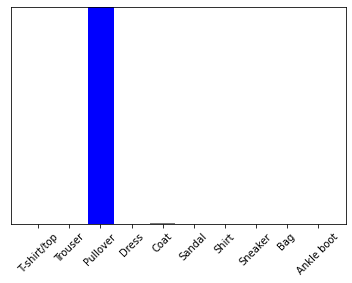

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [36]:
np.argmax(predictions_single[0])

2